# Part 3 Visualizing Time Series Data
By Josh Houlding

By visualizing time series data, we can detect patterns, identify its confidence, and spot potential problems like outliers and missing values.
For this activity, in 250-500 words, answer the following:

1. Plot the time series data in a line chart using the plot() function. Use the date feature as your indexed column when plotting the data. Show the results.
2. Zoom into a particular range of time: pick a range of 2 months from your dataset and plot it into a line chart. Show the results and explain the difference between this step and step 1.
3. Add linear or polynomial trend lines to your time series dataset: plot a trend line using the regplot function from the seaborn library. Show the results and interpret the trend line.
4. Suppress Seasonality: aggregate your data using the mean function at the yearly level to remove seasonality from your dataset. Plot the data and interpret the graph.
5. Lag Scatter Plot: plot a scatter plot to test the correlation between lag values. Import the lag plot class from the pandas plotting library. Then, show and interpret the graph.
6. Autocorrelation Plots: plot correlations with all possible lag values in your time-series dataset. Import the autocorrelation plot class from pandas plotting library. Show and interpret the graph. Explain how an autocorrelation function (ACF) and partial autocorrelation function (PACF) can be useful in forecasting.

<b>Dataset:</b> Air Quality (UCI ML Repository) https://archive.ics.uci.edu/dataset/360/air+quality

# Task 1
Plot the time series data in a line chart using the plot() function. Use the date feature as your indexed column when plotting the data. Show the results.

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [2]:
# Load data
df = pd.read_excel("AirQualityUCI.xlsx")

# Set "date" as index
df.set_index("date", inplace=True)

# View data 
pd.options.display.max_columns = None
df.head(3)

year  month  day same_day_last_year same_day_last_month  \
date                                                                  
2004-03-10  2004      3   10         2003-03-10          2004-02-10   
2004-03-10  2004      3   10         2003-03-10          2004-02-10   
2004-03-10  2004      3   10         2003-03-10          2004-02-10   

           same_day_last_week      time  true_co  sensor_co  true_nmhc  \
date                                                                     
2004-03-10         2004-03-03  18:00:00      2.6    1360.00      150.0   
2004-03-10         2004-03-03  19:00:00      2.0    1292.25      112.0   
2004-03-10         2004-03-03  20:00:00      2.2    1402.00       88.0   

            true_benzene  sensor_nmhc  true_nox  sensor_nox  true_no2  \
date                                                                    
2004-03-10     11.881723      1045.50     166.0     1056.25     113.0   
2004-03-10      9.397165       954.75     103.0     1173.75      92.0   
2004-03-10      8.997817       939.25     131.0     1140.00     114.0   

            sensor_no2  true_o3  temp  rel_humidity  abs_humidity  year_2mra  \
date                                                                           
2004-03-10     1692.00  1267.50  13.6     48.875001      0.757754        NaN   
2004-03-10     1558.75   972.25  13.3     47.700000      0.725487        NaN   
2004-03-10     1554.50  1074.00  11.9     53.975000      0.750239        NaN   

            month_2mra  day_2mra  true_co_2mra  sensor_co_2mra  \
date                                                             
2004-03-10         NaN       NaN           NaN             NaN   
2004-03-10         NaN       NaN           NaN             NaN   
2004-03-10         NaN       NaN           NaN             NaN   

            true_nmhc_2mra  true_benzene_2mra  sensor_nmhc_2mra  \
date                                                              
2004-03-10             NaN                NaN               NaN   
2004-03-10             NaN                NaN               NaN   
2004-03-10             NaN                NaN               NaN   

            true_nox_2mra  sensor_nox_2mra  true_no2_2mra  sensor_no2_2mra  \
date                                                                         
2004-03-10            NaN              NaN            NaN              NaN   
2004-03-10            NaN              NaN            NaN              NaN   
2004-03-10            NaN              NaN            NaN              NaN   

            true_o3_2mra  temp_2mra  rel_humidity_2mra  abs_humidity_2mra  \
date                                                                        
2004-03-10           NaN        NaN                NaN                NaN   
2004-03-10           NaN        NaN                NaN                NaN   
2004-03-10           NaN        NaN                NaN                NaN   

            year_exp_max  month_exp_max  day_exp_max  true_co_exp_max  \
date                                                                    
2004-03-10          2004              3           10              2.6   
2004-03-10          2004              3           10              2.6   
2004-03-10          2004              3           10              2.6   

            sensor_co_exp_max  true_nmhc_exp_max  true_benzene_exp_max  \
date                                                                     
2004-03-10             1360.0                150             11.881723   
2004-03-10             1360.0                150             11.881723   
2004-03-10             1402.0                150             11.881723   

            sensor_nmhc_exp_max  true_nox_exp_max  sensor_nox_exp_max  \
date                                                                    
2004-03-10               1045.5             166.0             1056.25   
2004-03-10               1045.5             166.0             1173.75   
2004-03-10               1045.5             1

In my view, it makes the most sense to simply plot the dataset's original numeric columns (the ones representing raw pollutant levels). These are the columns with "true" or "sensor" in their name, followed by the chemical only. Examples: `true_co`, `sensor_nmhc`. We will also plot temperature, relative humidity and absolute humidity. 

We will assign different variables to different plots according to their units. For example, `true_nmhc`, `true_benzene` and `true_no2` will go together because they are all in $micrograms/m^{3}$. 

In [3]:
# Rename "true_o3" to correct a mistake
df.rename(columns={"true_o3": "sensor_o3"}, inplace=True)

In [4]:
pollutant_columns = df[["true_co", "sensor_co", "true_nmhc", "sensor_nmhc", "true_benzene", "true_nox", "sensor_nox", 
                        "true_no2", "sensor_no2", "sensor_o3"]]

# Select relevant column groups for graphing
microgram_per_cubicmeter_columns = df[["true_nmhc", "true_benzene", "true_no2"]]
milligram_per_cubicmeter_columns = df[["true_co"]]
ppb_columns = df[["true_nox"]]
sensor_columns = df[["sensor_co", "sensor_nmhc", "sensor_nox", "sensor_no2", "sensor_o3"]]
# temp 
# rel hum
# abs hum

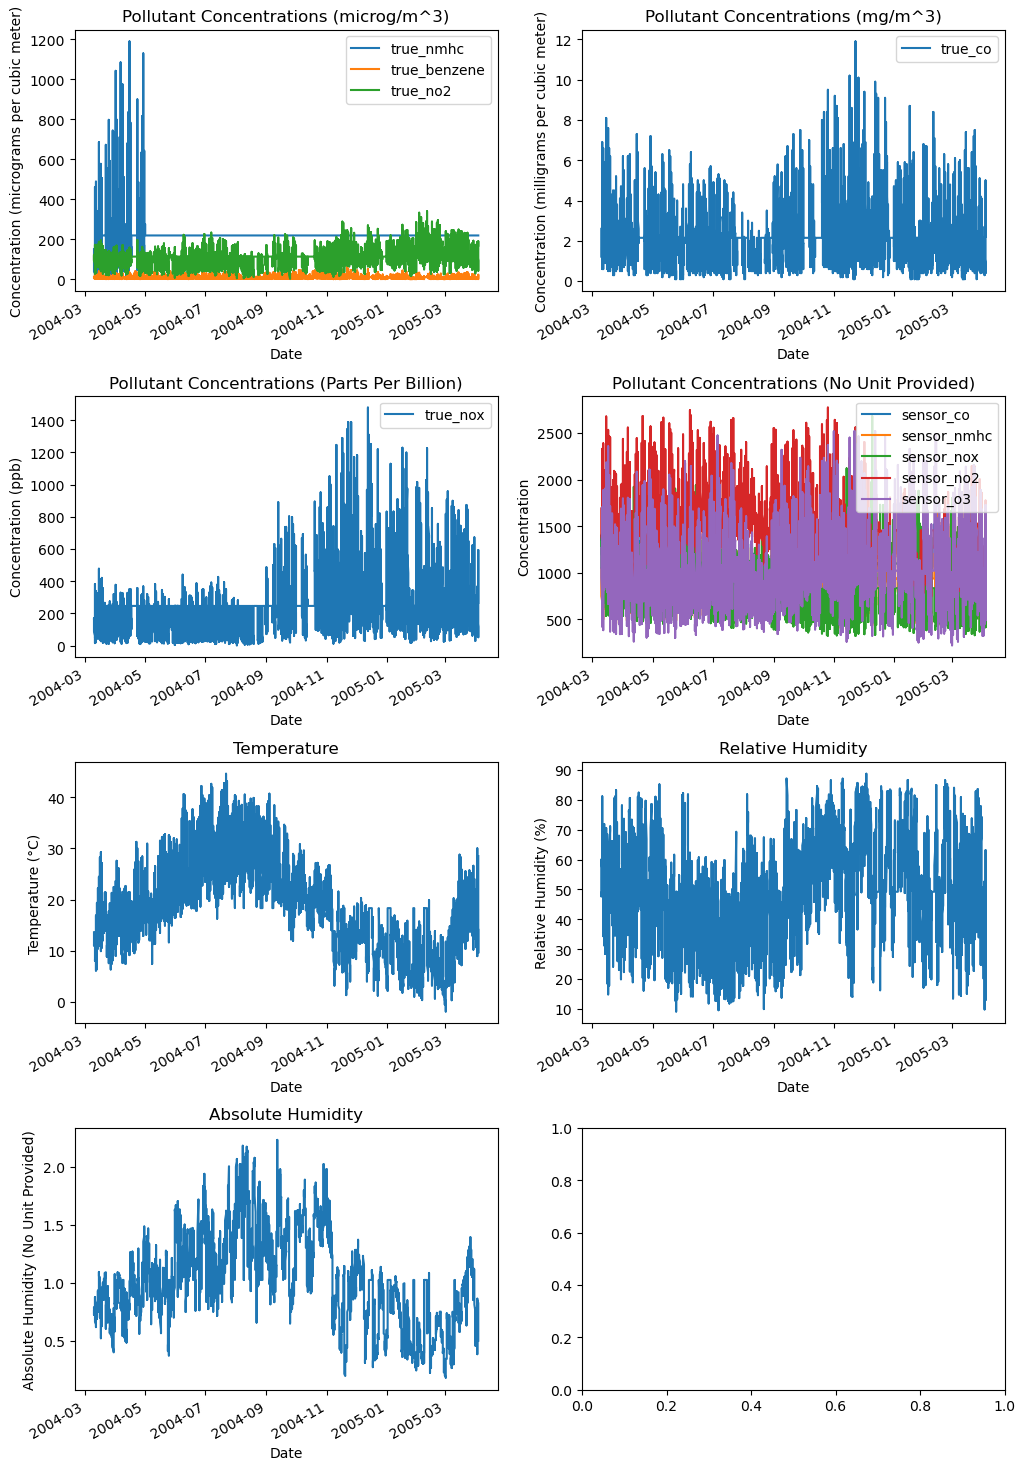

In [5]:
# Set up plot grid
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
axes = axes.flatten()

# Graph levels of pollutants measured in microg/m^3 over time
microgram_per_cubicmeter_columns.plot(ax=axes[0], figsize=(12, 20))
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Concentration (micrograms per cubic meter)")
axes[0].set_title("Pollutant Concentrations (microg/m^3)")

# Graph levels of carbon monoxide (CO) over time (measured in mg/m^3) 
milligram_per_cubicmeter_columns.plot(ax=axes[1], figsize=(12, 20))
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Concentration (milligrams per cubic meter)")
axes[1].set_title("Pollutant Concentrations (mg/m^3)")

# Graph levels of nitric oxide (NOx) over time (measured in parts per billion)
ppb_columns.plot(ax=axes[2], figsize=(12, 20))
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Concentration (ppb)")
axes[2].set_title("Pollutant Concentrations (Parts Per Billion)")

# Graph sensor readings
sensor_columns.plot(ax=axes[3], figsize=(12, 20))
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Concentration")
axes[3].set_title("Pollutant Concentrations (No Unit Provided)")

# Graph temperature
df["temp"].plot(ax=axes[4], figsize=(12, 20))
axes[4].set_xlabel("Date")
axes[4].set_ylabel("Temperature (°C)")
axes[4].set_title("Temperature")

# Graph relative humidity
df["rel_humidity"].plot(ax=axes[5], figsize=(12, 20))
axes[5].set_xlabel("Date")
axes[5].set_ylabel("Relative Humidity (%)")
axes[5].set_title("Relative Humidity")

# Graph absolute humidity
df["abs_humidity"].plot(ax=axes[6], figsize=(12, 20))
axes[6].set_xlabel("Date")
axes[6].set_ylabel("Absolute Humidity (No Unit Provided)")
axes[6].set_title("Absolute Humidity")

# Show plot
plt.subplots_adjust(hspace=0.4)
plt.show()

As we've seen in previous explorations of the data, most pollutant levels are at their highest during the 2004-2005 winter, possibly because of holiday travel, certain industrial processes, or increased heating usage due to cold temperatures.

# Task 2
Zoom into a particular range of time: pick a range of 2 months from your dataset and plot it into a line chart. Show the results and explain the difference between this step and step 1.

We will visualize pollutant concentrations between 11/2004 and 1/2005. 

In [6]:
# Define start and end dates of 2-month period
start_date = pd.to_datetime("2004-11-01")
end_date = pd.to_datetime("2005-01-01")

# Filter data down to this 2-month period
filtered_df = df[(df.index >= start_date) & (df.index < end_date)]

filtered_df.head(3)

year  month  day same_day_last_year same_day_last_month  \
date                                                                  
2004-11-01  2004     11    1         2003-11-01          2004-10-01   
2004-11-01  2004     11    1         2003-11-01          2004-10-01   
2004-11-01  2004     11    1         2003-11-01          2004-10-01   

           same_day_last_week      time  true_co  sensor_co   true_nmhc  \
date                                                                      
2004-11-01         2004-10-25  00:00:00      3.2     1352.5  218.811816   
2004-11-01         2004-10-25  01:00:00      3.7     1406.5  218.811816   
2004-11-01         2004-10-25  02:00:00      3.5     1333.0  218.811816   

            true_benzene  sensor_nmhc  true_nox  sensor_nox  true_no2  \
date                                                                    
2004-11-01     15.864362       1175.5     318.0      583.50      69.0   
2004-11-01     17.848492       1235.0     338.0      547.75      77.0   
2004-11-01     16.685885       1200.5     353.0      552.00      68.0   

            sensor_no2  sensor_o3    temp  rel_humidity  abs_humidity  \
date                                                                    
2004-11-01      1723.0    2149.75  20.075     71.299999      1.656382   
2004-11-01      1780.0    2519.25  20.050     71.125000      1.649795   
2004-11-01      1767.0    1925.25  19.625     73.200001      1.654350   

            year_2mra  month_2mra   day_2mra  true_co_2mra  sensor_co_2mra  \
date                                                                         
2004-11-01     2004.0   10.016667  29.733333      2.655092     1169.705556   
2004-11-01     2004.0   10.033333  29.266667      2.631758     1169.422222   
2004-11-01     2004.0   10.050000  28.800000      2.598425     1166.426389   

            true_nmhc_2mra  true_benzene_2mra  sensor_nmhc_2mra  \
date                                                              
2004-11-01      218.811816          12.484406       1037.401389   
2004-11-01      218.811816          12.409287       1035.309722   
2004-11-01      218.811816          12.252199       1031.034722   

            true_nox_2mra  sensor_nox_2mra  true_no2_2mra  sensor_no2_2mra  \
date                                                                         
2004-11-01     337.446042       685.788889      96.452517      1642.422222   
2004-11-01     333.262708       686.855556      95.452517      1639.034722   
2004-11-01     327.379375       688.338889      93.869184      1633.076389   

            true_o3_2mra  temp_2mra  rel_humidity_2mra  abs_humidity_2mra  \
date                                                                        
2004-11-01   1120.375000  19.987917          71.235417           1.639816   
2004-11-01   1139.933333  19.986250          71.050833           1.635340   
2004-11-01   1148.812500  19.985000          70.900417           1.631798   

            year_exp_max  month_exp_max  day_exp_max  true_co_exp_max  \
date                                                                    
2004-11-01          2004             11           31              9.5   
2004-11-01          2004             11           31              9.5   
2004-11-01          2004             11           31              9.5   

            sensor_co_exp_max  true_nmhc_exp_max  true_benzene_exp_max  \
date                                                                     
2004-11-01            2039.75               1189             52.054064   
2004-11-01            2039.75               1189             52.054064   
2004-11-01            2039.75               1189             52.054064   

            sensor_nmhc_exp_max  true_nox_exp_max  sensor_nox_exp_max  \
date                                                                    
2004-11-01              2006.75             952.0             1940.75   
2004-11-01              2006.75             952.0             1940.75   
2004-11-01     

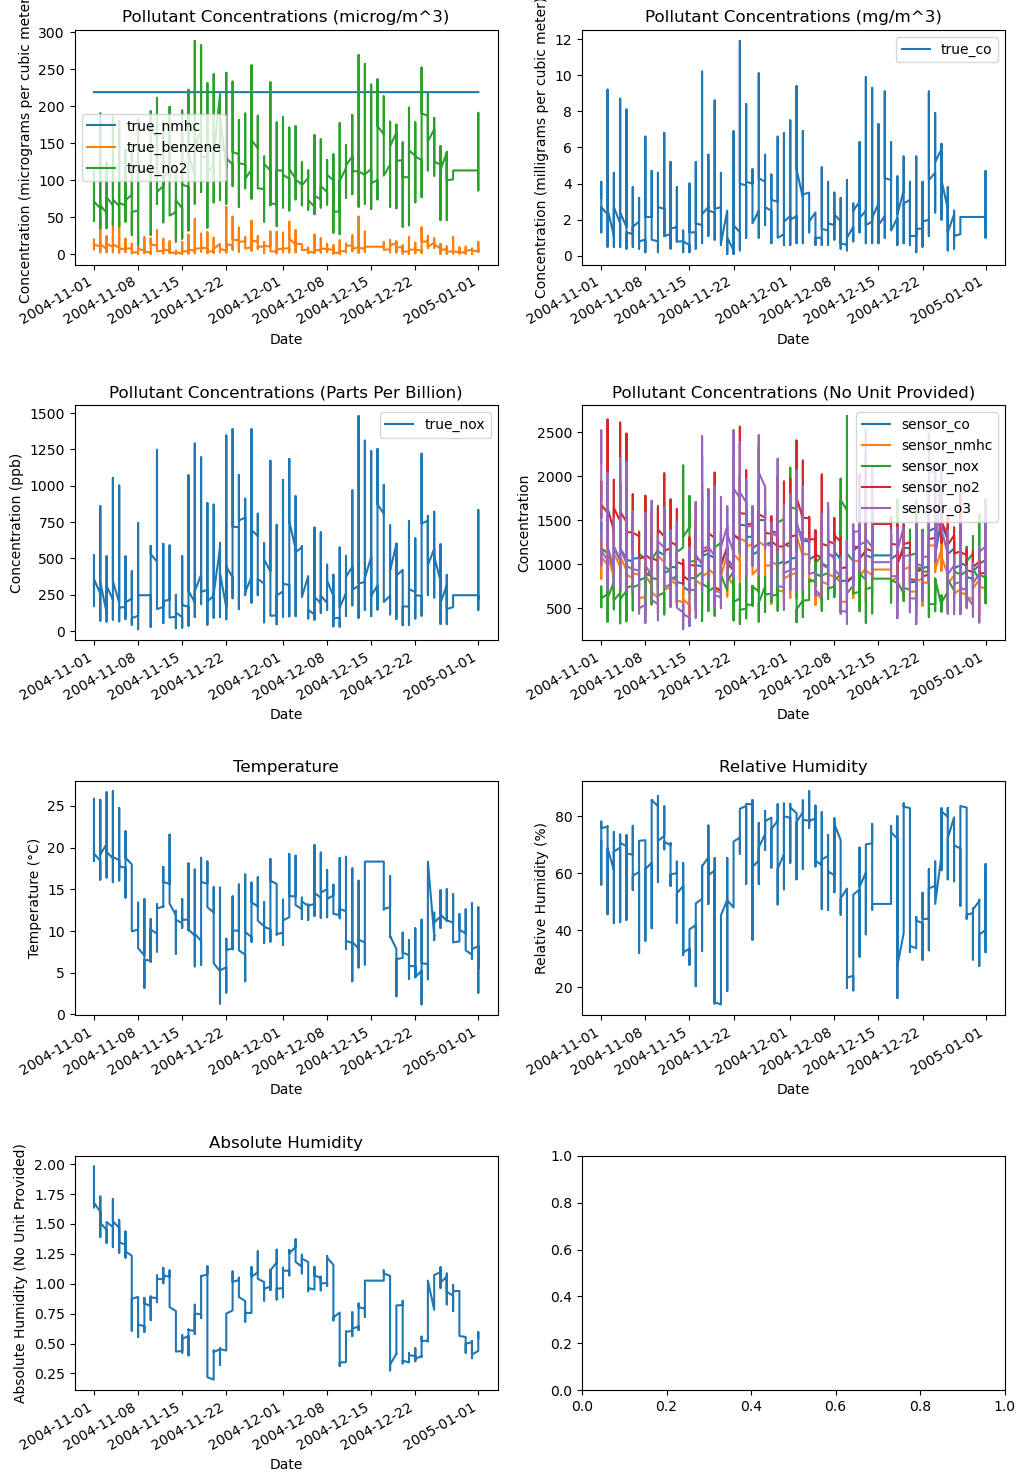

In [7]:
# Filter data down to the period between 2004-11-01 and 2005-01-01
start_date = pd.to_datetime("2004-11-01")
end_date = pd.to_datetime("2005-01-01")
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

# Select relevant column groups for graphing
microgram_per_cubicmeter_columns = filtered_df[["true_nmhc", "true_benzene", "true_no2"]]
milligram_per_cubicmeter_columns = filtered_df[["true_co"]]
ppb_columns = filtered_df[["true_nox"]]
sensor_columns = filtered_df[["sensor_co", "sensor_nmhc", "sensor_nox", "sensor_no2", "sensor_o3"]]

# Set up plot grid
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
axes = axes.flatten()

# Graph levels of pollutants measured in microg/m^3 over time
microgram_per_cubicmeter_columns.plot(ax=axes[0], figsize=(12, 20))
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Concentration (micrograms per cubic meter)")
axes[0].set_title("Pollutant Concentrations (microg/m^3)")

# Graph levels of carbon monoxide (CO) over time (measured in mg/m^3) 
milligram_per_cubicmeter_columns.plot(ax=axes[1], figsize=(12, 20))
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Concentration (milligrams per cubic meter)")
axes[1].set_title("Pollutant Concentrations (mg/m^3)")

# Graph levels of nitric oxide (NOx) over time (measured in parts per billion)
ppb_columns.plot(ax=axes[2], figsize=(12, 20))
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Concentration (ppb)")
axes[2].set_title("Pollutant Concentrations (Parts Per Billion)")

# Graph sensor readings
sensor_columns.plot(ax=axes[3], figsize=(12, 20))
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Concentration")
axes[3].set_title("Pollutant Concentrations (No Unit Provided)")

# Graph temperature
filtered_df["temp"].plot(ax=axes[4], figsize=(12, 20))
axes[4].set_xlabel("Date")
axes[4].set_ylabel("Temperature (°C)")
axes[4].set_title("Temperature")

# Graph relative humidity
filtered_df["rel_humidity"].plot(ax=axes[5], figsize=(12, 20))
axes[5].set_xlabel("Date")
axes[5].set_ylabel("Relative Humidity (%)")
axes[5].set_title("Relative Humidity")

# Graph absolute humidity
filtered_df["abs_humidity"].plot(ax=axes[6], figsize=(12, 20))
axes[6].set_xlabel("Date")
axes[6].set_ylabel("Absolute Humidity (No Unit Provided)")
axes[6].set_title("Absolute Humidity")

# Show plot
plt.subplots_adjust(hspace=0.6)
plt.show()

Looking at a 2-month slice of time instead of the entire period gives us a finer-grained look at short-term trends in the data. With nitric oxide (NOx) in particular, we can see a huge spike in emissions in mid-to-late December, probably because of frequent holiday travel. Carbon monoxide (CO) levels seem to rise and fall frequently over this period, indicating some kind of cycle is present. We do also notice a problem with `true_nmhc` in the first plot, since it has a constant value over this 2-month window. This indicates a data quality issue in the original dataset, but this is difficult to resolve since the true values are not known. 

In [8]:
# Find value of horizontal line in plot of "true_nmhc"
df["true_nmhc"].mode()

0    218.811816
Name: true_nmhc, dtype: float64

# Task 3
Add linear or polynomial trend lines to your time series dataset: plot a trend line using the regplot function from the seaborn library. Show the results and interpret the trend line.

We will plot every original numeric column (`true_co`, `sensor_co`, `true_nmhc`, ...) with trend lines to give the clearest look into how each pollutant level, along with temperature and relative and absolute humidity, has changed over the given period. 

Because `sns.regplot()` is intended for creating scatterplots, I believe it makes more sense to continue plotting line plots in the way I have been doing them so far. 

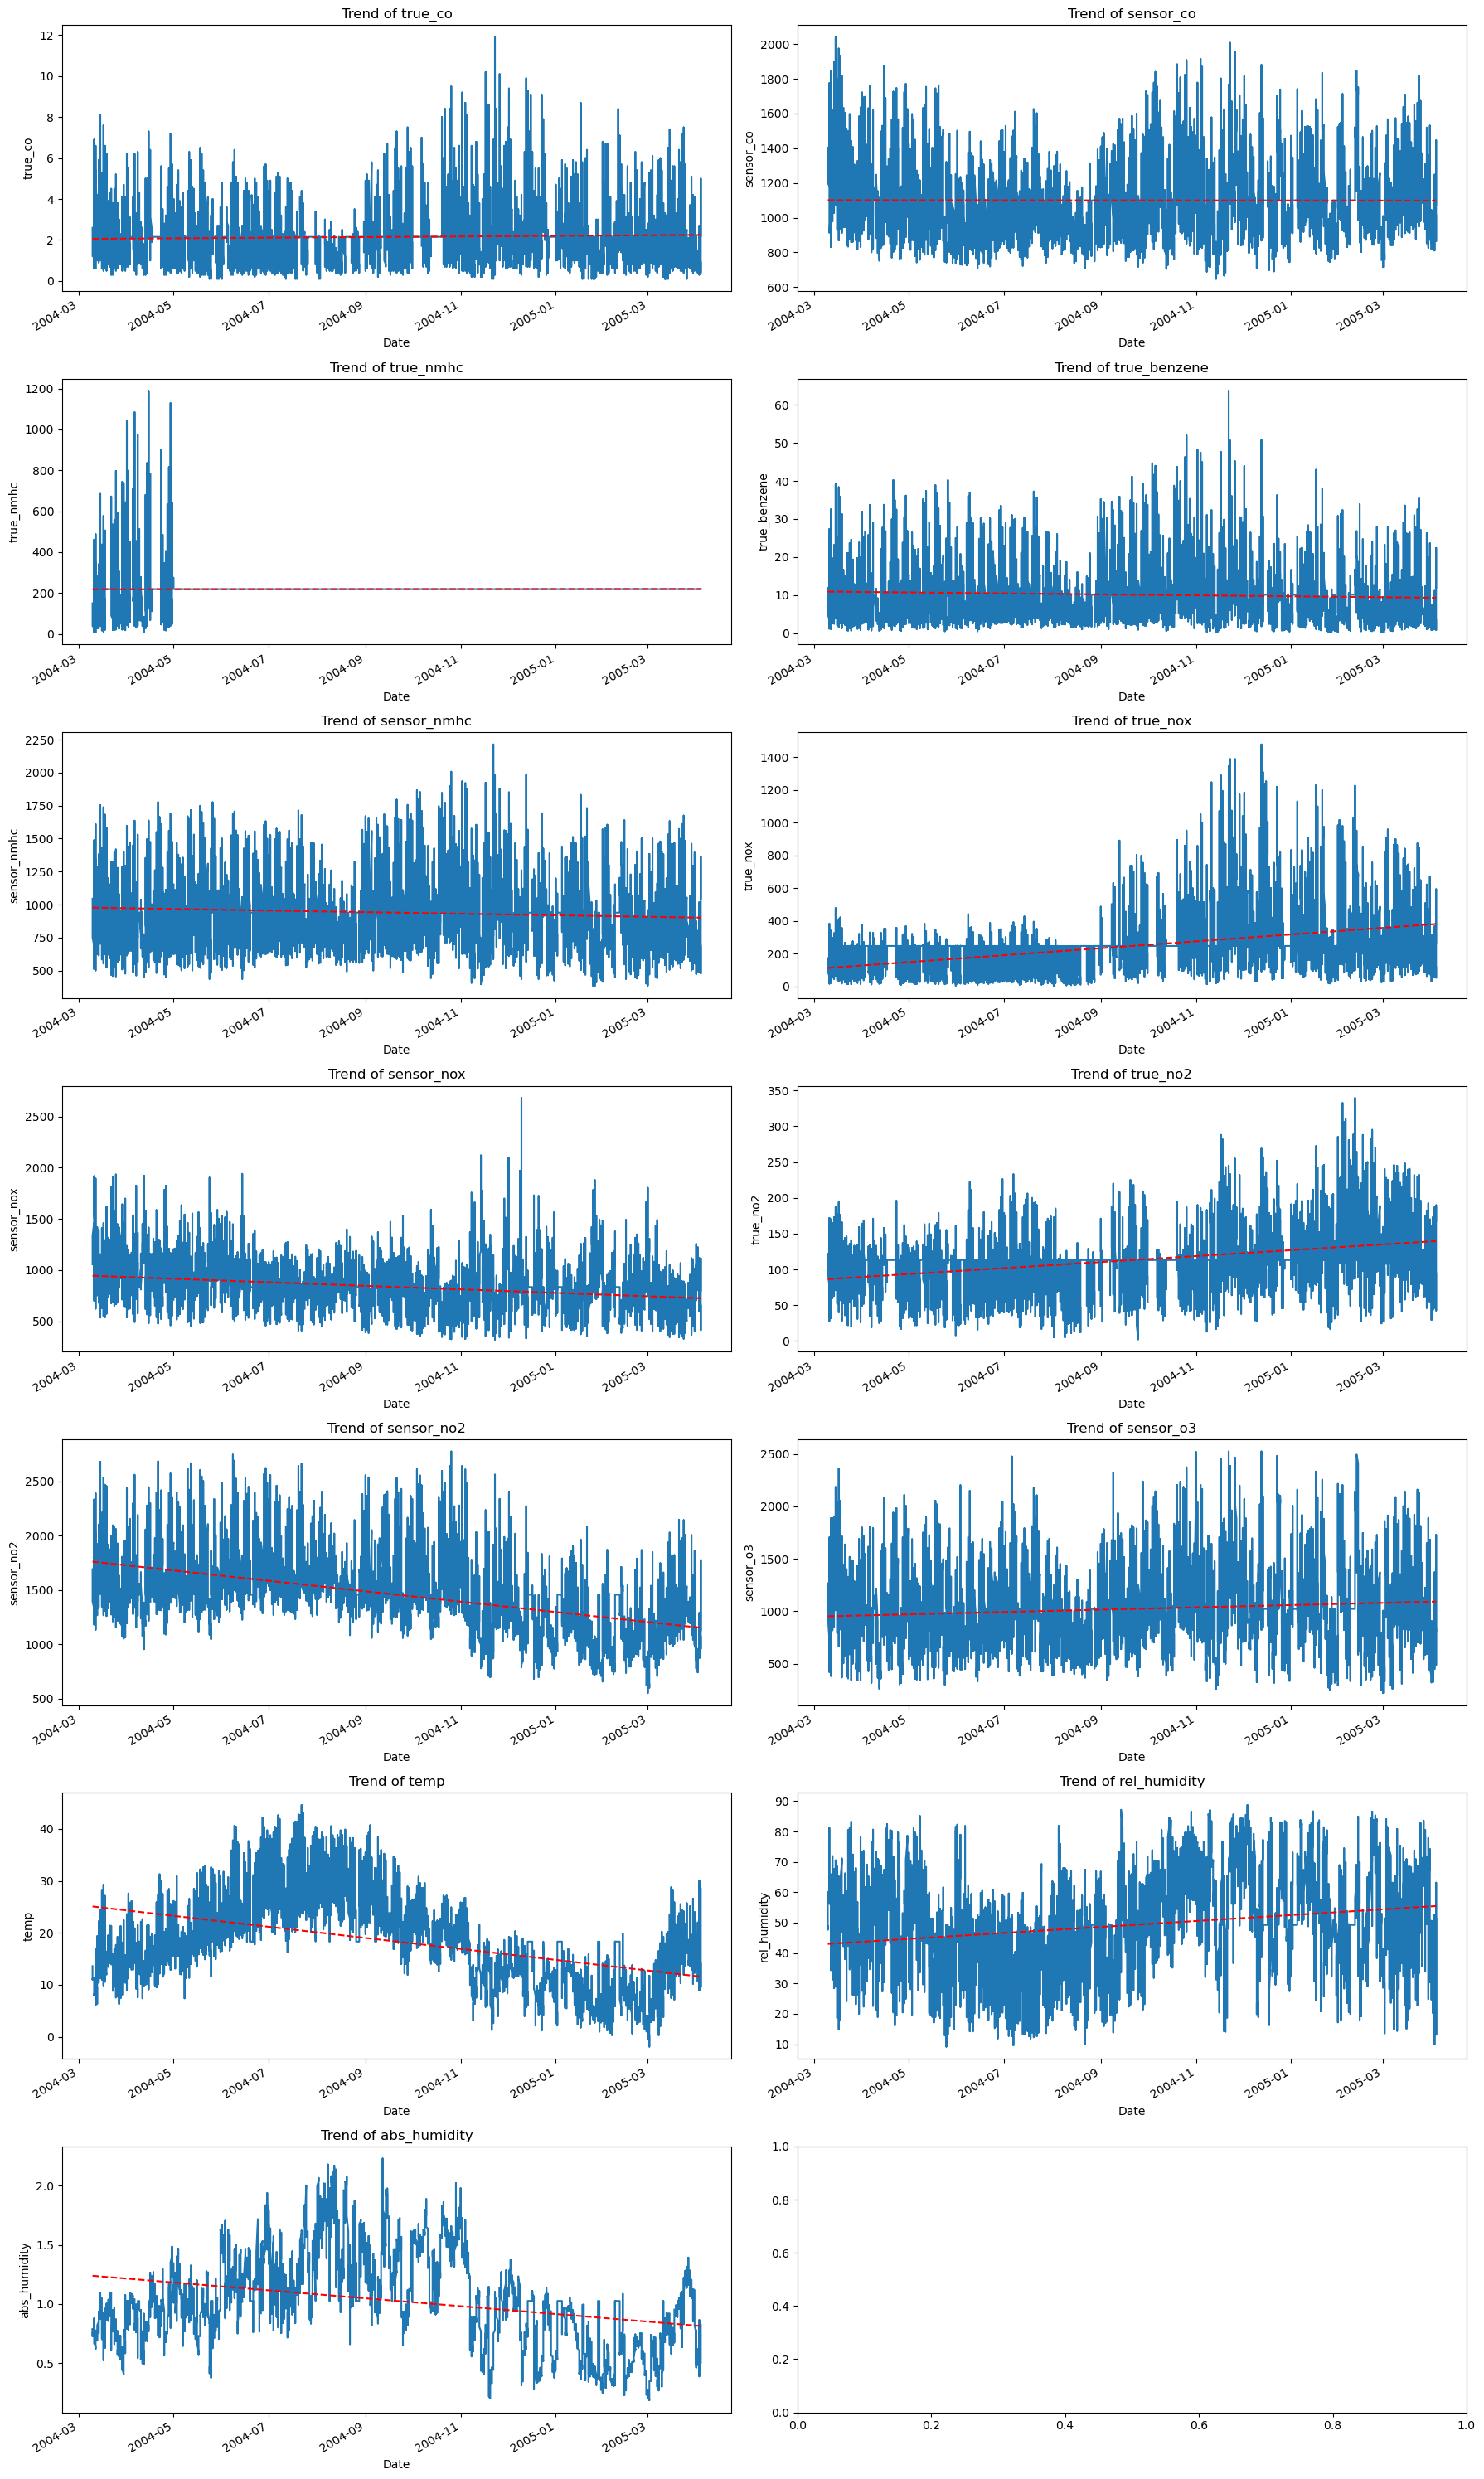

In [9]:
# Select original numeric columns for plotting
original_numeric_columns = df[["true_co", "sensor_co", "true_nmhc", "true_benzene", "sensor_nmhc", "true_nox", "sensor_nox", 
                               "true_no2", "sensor_no2", "sensor_o3", "temp", "rel_humidity", "abs_humidity"]]

# Create figure and grid
fig, axes = plt.subplots(7, 2, figsize=(18, 30))
axes = axes.flatten()

# Plot each column with trend lines
for i, column in enumerate(original_numeric_columns.columns): 
    
    # Plot original data
    original_numeric_columns[column].plot(ax=axes[i])
    
    # Calculate trend line
    index_numeric = original_numeric_columns.index.astype(np.int64) // 10**9
    z = np.polyfit(index_numeric, original_numeric_columns[column], 1)
    trend_line = np.poly1d(z)
    
    # Plot trend line
    axes[i].plot(original_numeric_columns.index, trend_line(index_numeric), color="red", linestyle="--", label="Trend Line")
    
    # Set labels and title
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(column)
    axes[i].set_title(f"Trend of {column}")   

# Show plots
plt.tight_layout()
plt.show()

We see that about half of the variables (`true_benzene`, `sensor_nmhc`, `sensor_nox`, `sensor_no2`, `temp`, and `abs_humidity`) show a negative trend, while four of them (`true_nox`, `true_no2`, `sensor_o3`, and `rel_humidity`) are increasing, and `true_co` and `true_nmhc` show no obvious trend. In the case of `true_nmhc`, the problem is caused by the abundance of values that are approximately 218.81 (as we saw earlier with the mode of the column). 

# Task 4
Suppress Seasonality: aggregate your data using the mean function at the yearly level to remove seasonality from your dataset. Plot the data and interpret the graph.

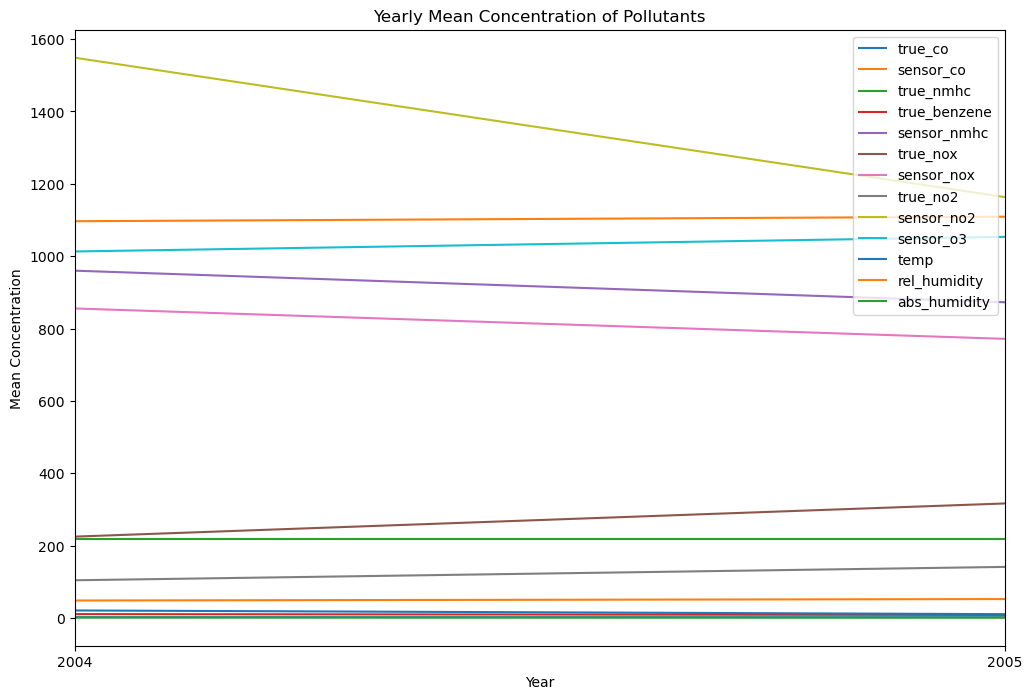

In [10]:
# Aggregate original numeric columns
yearly_mean = original_numeric_columns.resample("Y").mean()

# Plot aggregated data
yearly_mean.plot(figsize=(12, 8))
plt.xlabel("Year")
plt.ylabel("Mean Concentration")
plt.title("Yearly Mean Concentration of Pollutants")
plt.show()

We see that `sensor_no2` has decreased drastically from 2004 to 2005, while most other readings have either stayed the same or increased slightly. 

# Task 5
Lag Scatter Plot: plot a scatter plot to test the correlation between lag values. Import the lag plot class from the pandas plotting library. Then, show and interpret the graph.

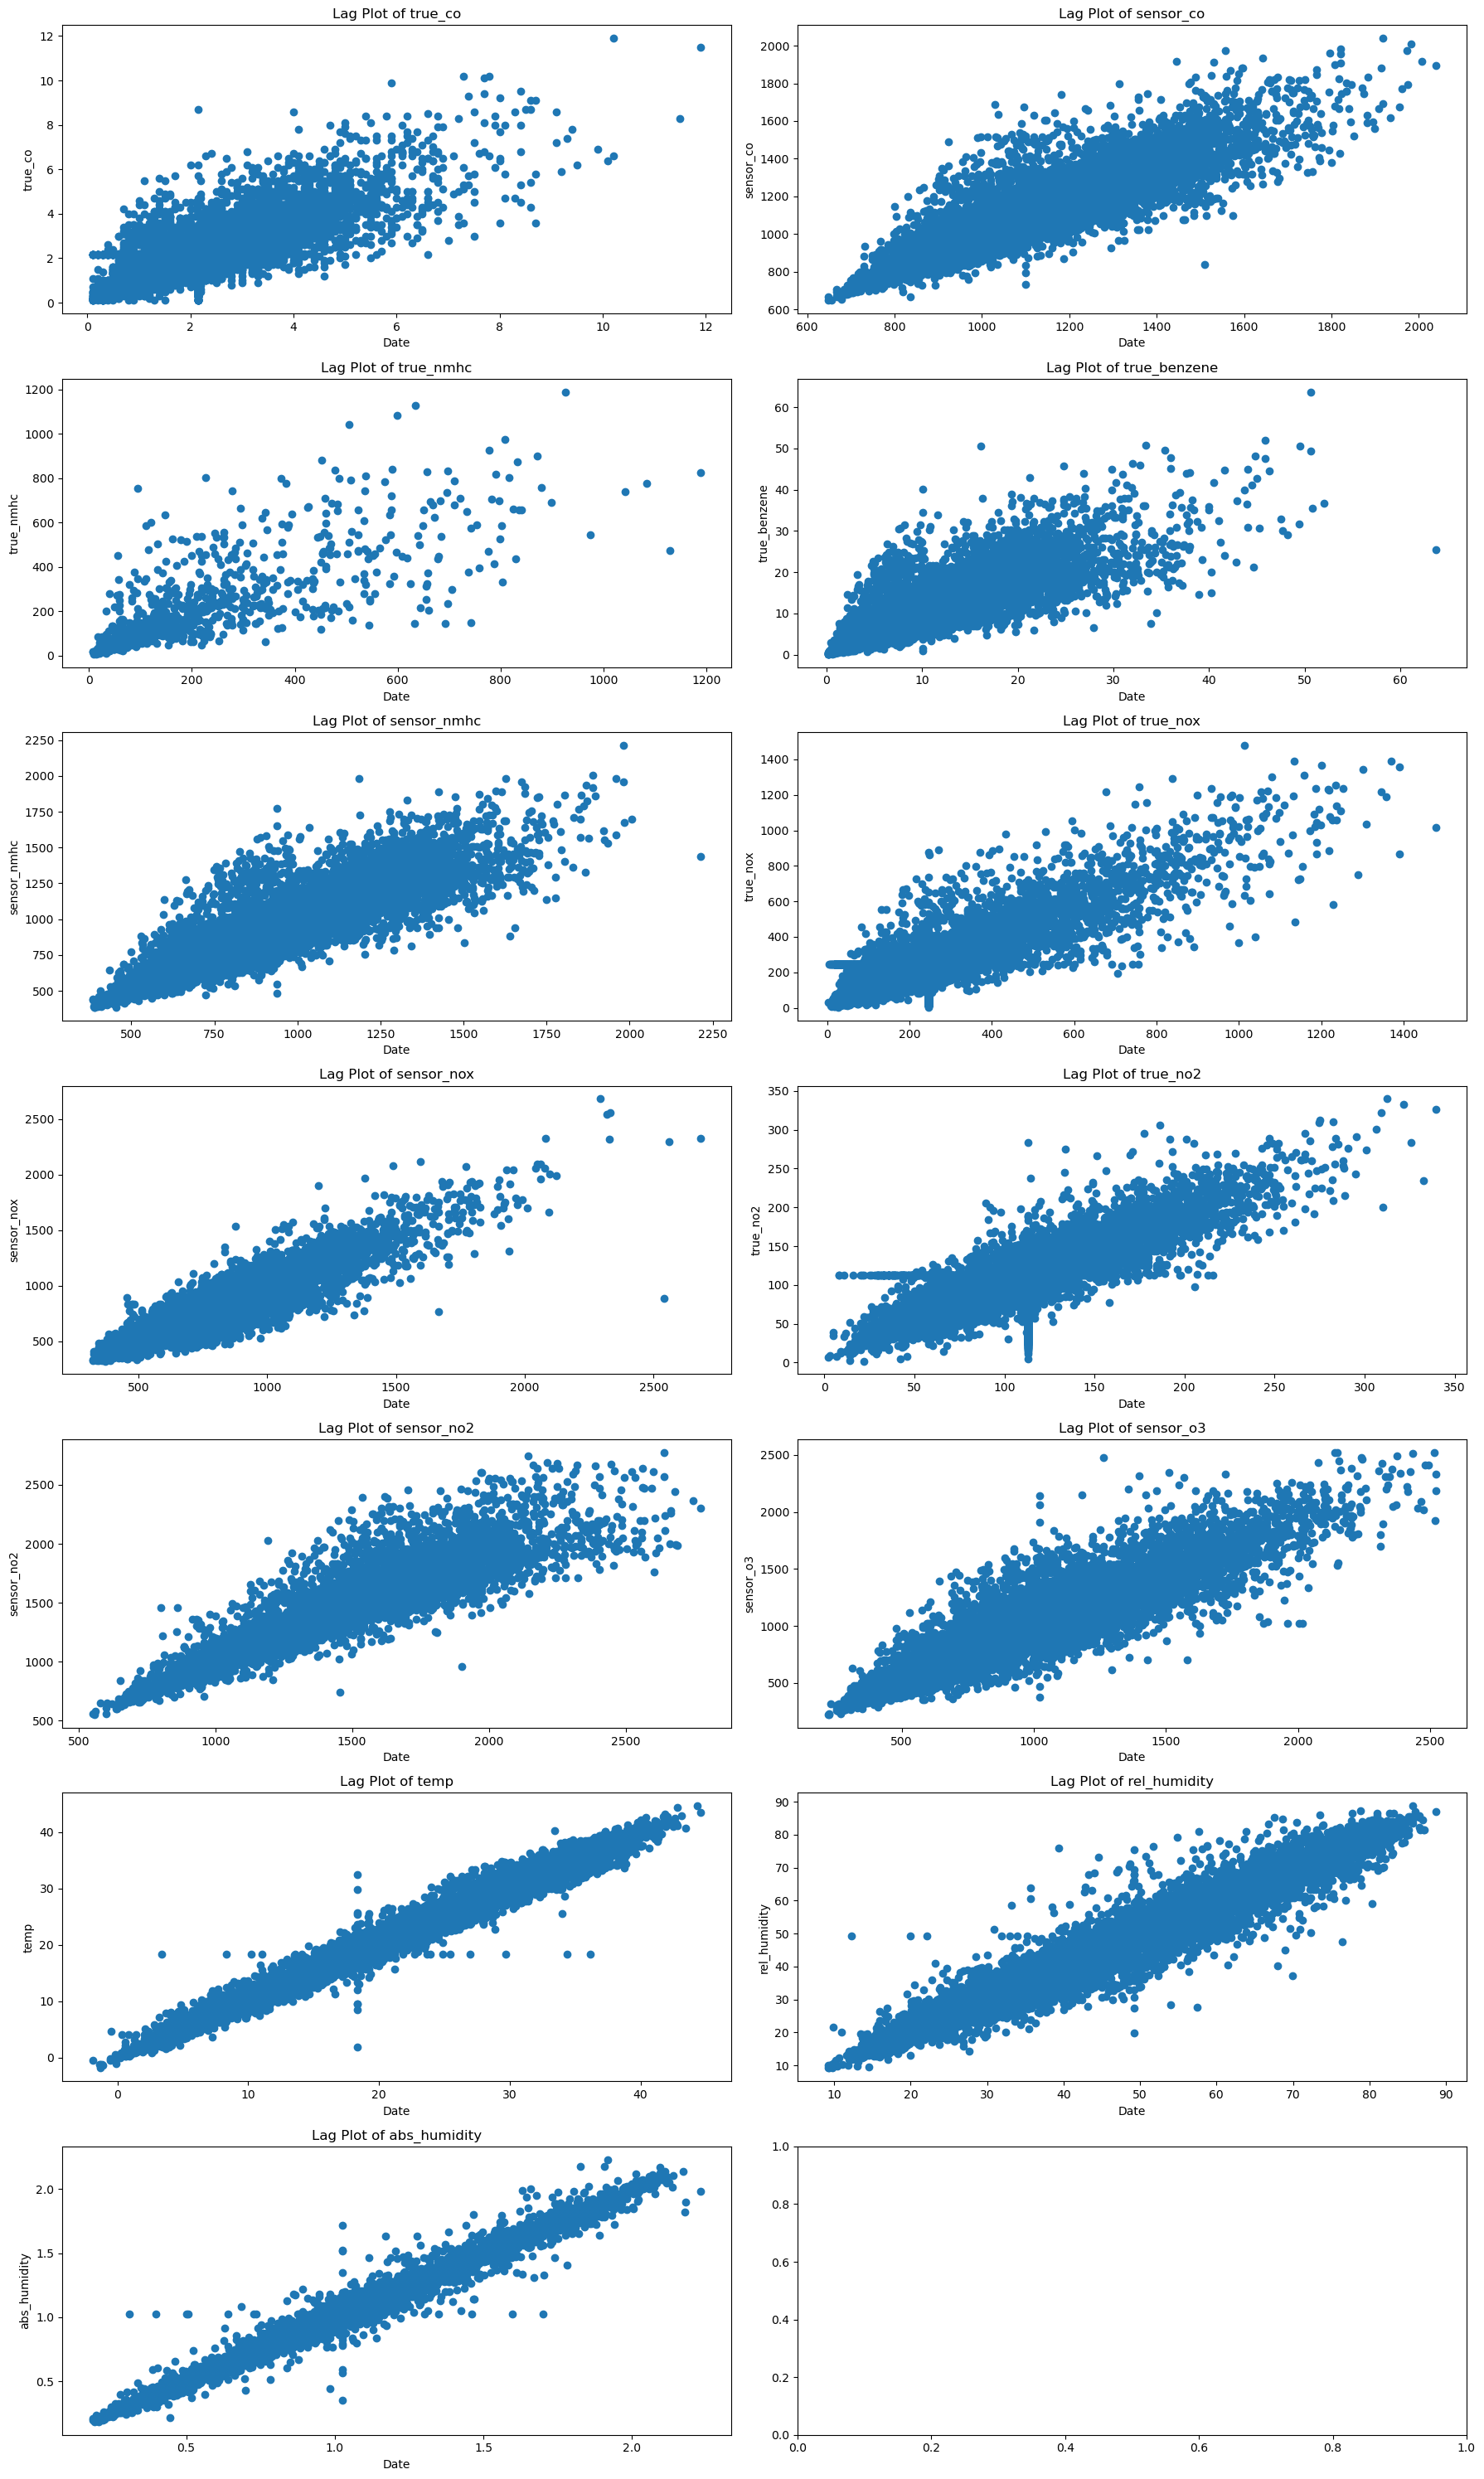

In [11]:
# Create figure and grid
fig, axes = plt.subplots(7, 2, figsize=(18, 30))
axes = axes.flatten()

# Create lag plot for each column
for i, column in enumerate(original_numeric_columns.columns): 
    
    # Plot original data
    lag_plot(original_numeric_columns[column], lag=1, ax=axes[i])
    
    # Set labels and title
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(column)
    axes[i].set_title(f"Lag Plot of {column}")   

# Show plots
plt.tight_layout()
plt.show()

We see a positive relationship between current observations and lagged values for every original variable, suggesting that the current values all depend on the previous values, IE autocorrelation is present. 

# Task 6
Autocorrelation Plots: plot correlations with all possible lag values in your time-series dataset. Import the autocorrelation plot class from pandas plotting library. Show and interpret the graph. Explain how an autocorrelation function (ACF) and partial autocorrelation function (PACF) can be useful in forecasting.

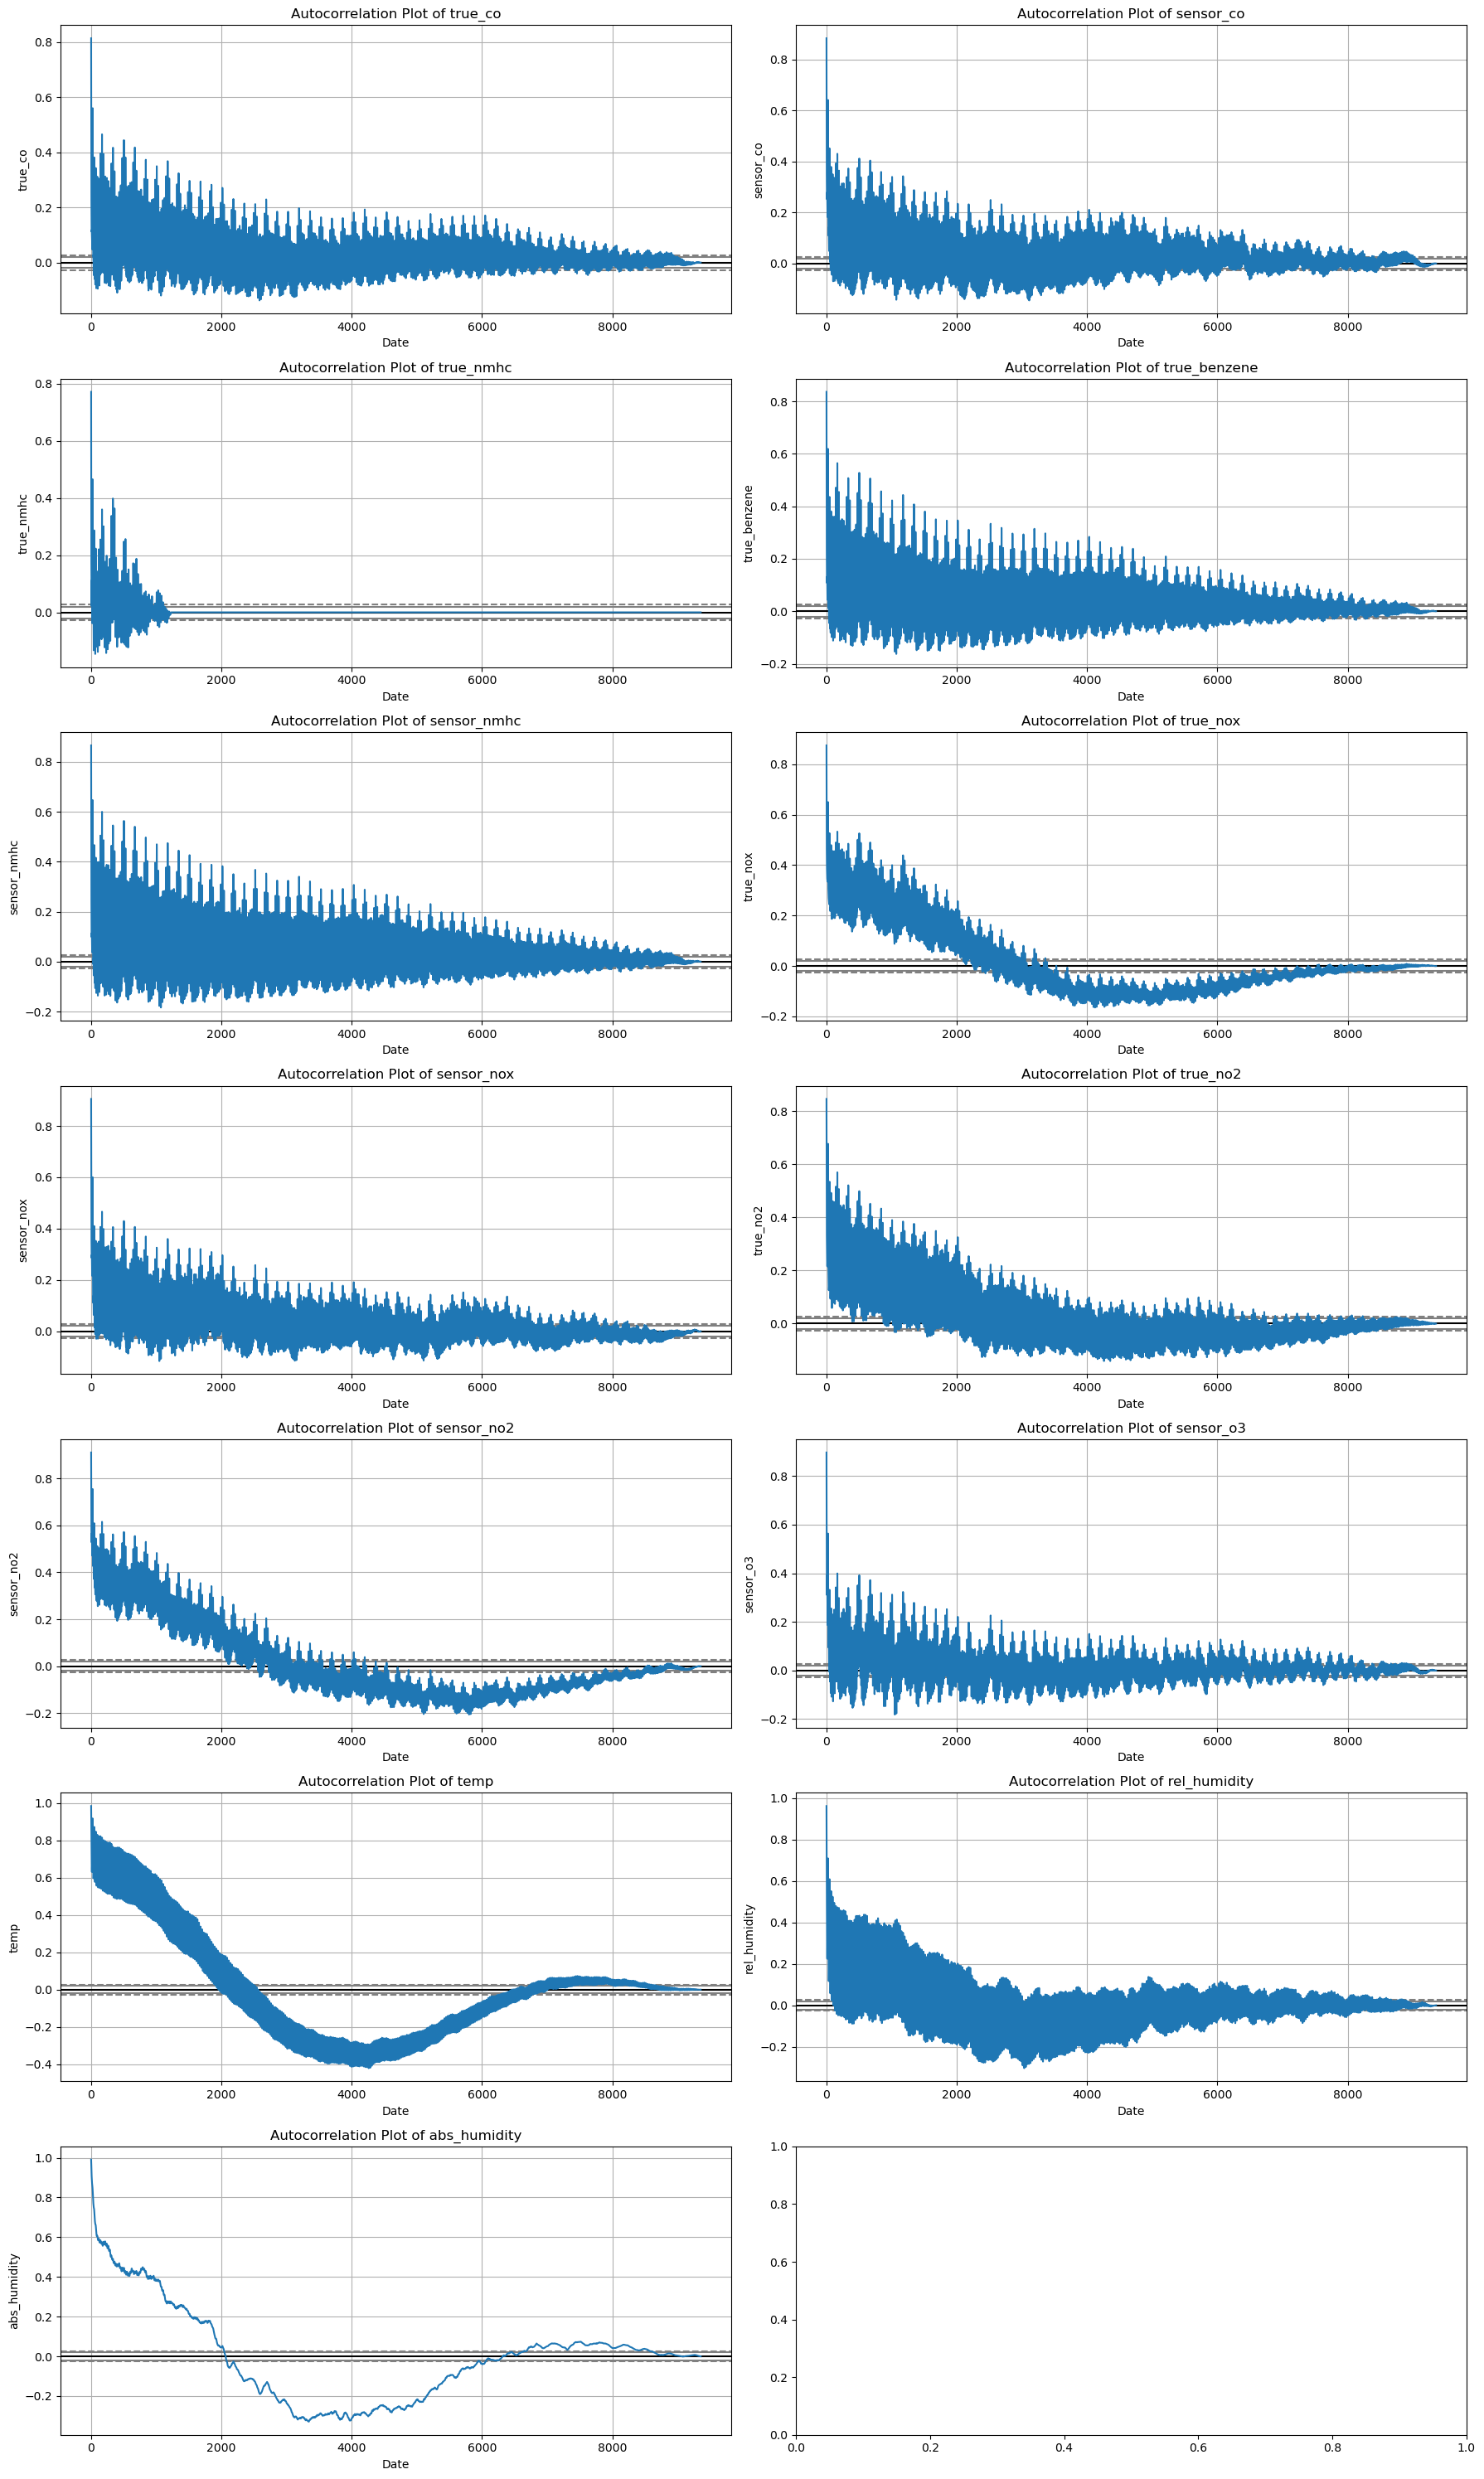

In [13]:
# Create figure and grid
fig, axes = plt.subplots(7, 2, figsize=(18, 30))
axes = axes.flatten()

# Create autocorrelation plot for each column
for i, column in enumerate(original_numeric_columns.columns): 
    
    # Plot original data
    autocorrelation_plot(original_numeric_columns[column], ax=axes[i])
    
    # Set labels and title
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(column)
    axes[i].set_title(f"Autocorrelation Plot of {column}")   

# Show plots
plt.tight_layout()
plt.show()

We see that every autocorrelation plot stabilizes near 0 on the vertical axis by the end of the time interval, suggesting that autocorrelation between current and lagged observations steadily decreases with time for every original variable in the dataset. 

Explain how an autocorrelation function (ACF) and partial autocorrelation function (PACF) can be useful in forecasting.
Autocorrelation functions are very useful for detecting autocorrelation between a time series and its lagged values at various time lags, helping us understand the degree to which past observations influence current ones. On the other hand, partial autocorrelation functions measure the correlation between two variables while accounting for the effects of intermediate lag values, making it useful for understanding how the current observation is related to the previous one without the influence of other lags getting in the way. 

# References
ChatGPT. (n.d.). https://chat.openai.com/ <br>
GfG. (2023, November 22). Autocorrelation and partial autocorrelation. GeeksforGeeks. https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/